In [1]:
import pandas as pd
import numpy as np
import csv

import requests
from io import StringIO

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

# Problem A

## Imputing missing value

In [2]:
url_1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases' \
    '/credit-screening/crx.data'
attributes_1 = (
    'A1', 'A2', 'A3', 
    'A4', 'A5', 'A6', 
    'A7', 'A8', 'A9', 
    'A10', 'A11', 'A12',
    'A13', 'A14', 'A15',
    'class')
df_1 = pd.read_csv(
    StringIO(requests.get(url_1).content.decode('utf-8')), names = attributes_1)
df_1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
df_1_1 = df_1.replace('?', np.nan) 

In [4]:
df_1_1[['A2','A14']] = df_1_1[["A2",'A14']].astype(float)

In [5]:
df_1_1.mean()

A2       31.568171
A3        4.758725
A8        2.223406
A11       2.400000
A14     184.014771
A15    1017.385507
dtype: float64

In [6]:
df_1_1.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

In [7]:
values = {'A1':df_1_1["A1"].mode()[0], 'A2':df_1_1["A2"].mean(), 'A3':df_1_1["A3"].mean(), 
    'A4':df_1_1["A4"].mode()[0], 'A5':df_1_1["A5"].mode()[0], 'A6':df_1_1["A6"].mode()[0], 
    'A7':df_1_1["A7"].mode()[0], 'A8':df_1_1["A8"].mean(), 'A9':df_1_1["A9"].mode()[0], 
    'A10':df_1_1["A10"].mode()[0], 'A11':df_1_1["A11"].mean(), 'A12':df_1_1["A12"].mode()[0],
    'A13':df_1_1["A13"].mode()[0], 'A14':df_1_1["A14"].mean(), 'A15':df_1_1["A15"].mean()}

In [8]:
df_1_1 = df_1_1.fillna(values)

In [9]:
df_1_1.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64

In [10]:
df_1_final = pd.get_dummies(df_1_1, prefix=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 
                                            'A13','class'])

In [11]:
df_1_final[['A2','A3','A8','A11','A14','A15']] = df_1_final[['A2','A3','A8','A11','A14','A15']] / df_1_final[['A2','A3','A8','A11','A14','A15']].max()

In [12]:
df_1_final = df_1_final.sample(frac = 1, random_state = 7021).reset_index(drop = True)
df_1_final = df_1_final.drop(columns = ['class_-','A1_a','A4_u','A5_g','A6_d','A7_bb','A9_t','A10_f','A12_t','A13_g'])

## Split set

In [13]:
N_train_1 = round(0.75 * df_1_final.shape[0])
N_train_1

518

In [14]:
X_1 = df_1_final.iloc[:,:-1]
y_1 = df_1_final.iloc[:, -1]
X_train_1 = X_1.iloc[0:N_train_1,:]
X_test_1 = X_1.iloc[N_train_1:,:]
y_train_1 = y_1.iloc[:N_train_1]
y_test_1 = y_1.iloc[N_train_1:]

In [15]:
N_1, P_1 = X_train_1.shape

## Cross validation

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0.8551132544696867, 0.8551132544696867, 0.8304543621454497, 0.8406455840838823, 0.8536597660975938, 0.834806425594838, 0.8203303535421428, 0.8101727382712731, 0.8174317784648475, 0.7985532329614196, 0.7971333512568894, 0.8087276515660707, 0.7970997445893265, 0.7985532329614196, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335]


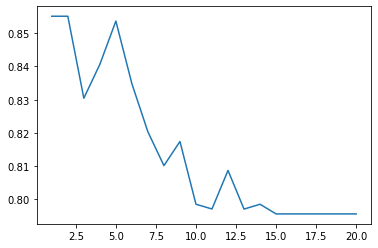

The best accuracy of CART is 0.8551132544696867 and the corresponding depth is 1


In [23]:
%matplotlib inline 
from sklearn.model_selection import cross_val_score

score_list = []
depths = []

for dep in range(1,21):
    depths.append(dep)
    clf_cross = DecisionTreeClassifier(
        max_depth = dep, max_leaf_nodes = 2**dep, random_state = 7021)
    scores = cross_val_score(clf_cross, X_1, y_1, cv=4)
    score_list.append(scores.mean())

print(depths,score_list)

plt.plot(depths,score_list)
plt.show()

print('The best accuracy of CART is', max(score_list),'and the corresponding depth is',score_list.index(max(score_list))+1)

## CART

In [24]:
depth = 1

In [25]:
clf_1 = DecisionTreeClassifier(
    max_depth = depth, max_leaf_nodes = 2**depth, random_state = 7021)
clf_1.fit(X_train_1, y_train_1)


DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, random_state=7021)

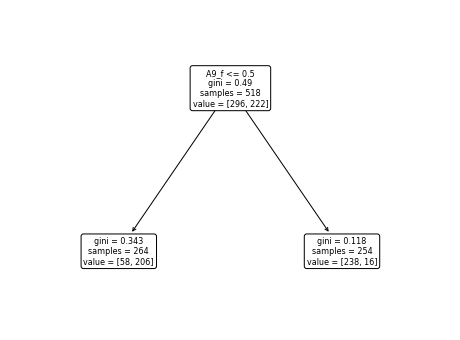

In [26]:
fig_1 = plt.figure(figsize = (8, 6))
_ = plot_tree(
    clf_1, filled = False, fontsize = 8, rounded = True, feature_names = tuple(df_1_final.columns[0:-1]))
fig_1.savefig('CART_1.png')

In [27]:
print(export_text(clf_1, feature_names = tuple(df_1_final.columns[0:-1])))

|--- A9_f <= 0.50
|   |--- class: 1
|--- A9_f >  0.50
|   |--- class: 0



In [28]:
def find_path(root, path, x, children_left, children_right):
    path.append(root)
    if root == x:
        return True
    left = False
    right = False
    if (children_left[root] != -1):
        left = find_path(children_left[root], path, x, children_left, children_right)
    if (children_right[root] != -1):
        right = find_path(children_right[root], path, x, children_left, children_right)
    if left or right:
        return True
    path.remove(root)
    return False

def get_rule(path, children_left, attributes, feature, threshold):
    mask = ''
    for idx, node in enumerate(path):
        # filter out the leaf node
        if idx != len(path) - 1:
            # left or right branch node
            if (children_left[node] == path[idx + 1]):
                mask += "('{}' <= {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
            else:
                mask += "('{}' > {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "").strip()
    return mask

In [29]:
children_left_1 = clf_1.tree_.children_left
children_right_1 = clf_1.tree_.children_right
feature_1 = clf_1.tree_.feature
threshold_1 = clf_1.tree_.threshold

In [30]:
leaf_id_1 = np.unique(clf_1.apply(X_train_1))

paths_1 = {}
for leaf in leaf_id_1:
    path_leaf = []
    find_path(0, path_leaf, leaf, children_left_1, children_right_1)
    paths_1[leaf] = path_leaf

CART_rules_1 = {}
for leaf in paths_1:
    CART_rules_1[leaf] = get_rule(paths_1[leaf], children_left_1, tuple(df_1_final.columns[0:-1]), feature_1, threshold_1)

In [31]:
leaf_id_1

array([1, 2], dtype=int64)

In [32]:
CART_rules_1

{1: "('A9_f' <= 0.50)", 2: "('A9_f' > 0.50)"}

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
total_nodes_1 = clf_1.tree_.node_count
leaf_nodes_1 = round(total_nodes_1 / 2)
branch_nodes_1 = total_nodes_1 // 2

In [35]:
initial_a_1 = np.array([i for i in clf_1.tree_.feature if i != -2])
initial_a_1

array([32], dtype=int64)

In [36]:
initial_b_1 = np.array([i for i in clf_1.tree_.threshold if i != -2])
initial_b_1

array([0.5])

In [37]:
clf_1.score(X_train_1, y_train_1)

0.8571428571428571

In [38]:
clf_1.score(X_test_1, y_test_1)

0.8488372093023255

### Rules and performance of CART

In [39]:
print('The decision rules in CART is ', CART_rules_1)
print('\nThe in-sample performance in CART is', clf_1.score(X_train_1, y_train_1))
print('\nThe out-of-sample performance in CART is', clf_1.score(X_test_1, y_test_1))

The decision rules in CART is  {1: "('A9_f' <= 0.50)", 2: "('A9_f' > 0.50)"}

The in-sample performance in CART is 0.8571428571428571

The out-of-sample performance in CART is 0.8488372093023255


## OCT

Based on the structure of CART, the depth of OCT is also 1.

After respectively testing on alpha = 0.3, 0.5, 0.6 and epsilon = 0.01, 0.001, 0.0001, 10e-7, 10e-8, I find that the best accuracy is based on alpha = 0.6 and epsilon = 0.01.

In [42]:
alpha = 0.6
K = 2
Y_1 = np.zeros([N_1, K], dtype = int) - 1
Y_1[X_train_1.index, y_train_1.astype(int)] = 1
Y_1.shape

(518, 2)

In [43]:
import os
os.add_dll_directory(os.path.join(os.getenv('GUROBI_HOME'), 'bin'))

from gurobipy import *
model = Model('mip1')

<AddedDllDirectory('F:\\gurobi\\win64\\bin')>

Using license file C:\Users\Ke Xu\gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-09


In [44]:
# declare decision variables

# d: [# branch nodes], whether a branch node applies a split or not
d = model.addVars(branch_nodes_1 ,vtype = GRB.BINARY, name = "d") # ∈ {0, 1}
# split criterion: ax < b / ax >== b
# a: [# branch nodes, p], b: [# branch nodes]
a = model.addVars(branch_nodes_1, P_1, vtype = GRB.BINARY, name = 'a') # ∈ {0, 1}
b = model.addVars(branch_nodes_1 ,vtype = GRB.CONTINUOUS, name = "b")

# l: [# leaf nodes], whether a leaf node contains any points or not
l = model.addVars(leaf_nodes_1, vtype = GRB.BINARY, name = "l") # ∈ {0, 1}
# z: [# points, # branch nodes], a point is assigned to which leaf node
z = model.addVars(N_1, leaf_nodes_1, vtype = GRB.BINARY, name = "z") # ∈ {0, 1}

# N_kt: [# labels, # leaf nodes], number of points labelled for class k in a leaf node
N_kt = model.addVars(K, leaf_nodes_1, vtype = GRB.INTEGER, name = "N_kt")
# N_t: [# leaf nodes], number of points in the leaf
N_t = model.addVars(leaf_nodes_1, vtype = GRB.INTEGER, name = "N_t")

# c_kt: [# labels, # leaf nodes], whether predicted label is label k for a leaf node
c_kt = model.addVars(K, leaf_nodes_1, vtype = GRB.BINARY, name = "c") # ∈ {0, 1}
# L: [# leaf nodes], misclassification loss for a leaf node
L = model.addVars(leaf_nodes_1, vtype = GRB.INTEGER, name = "L")

In [45]:
# warm start using the results of CART algorithm
for t in range(branch_nodes_1):
    a[t, initial_a_1[t]].start = 1
    b[t].start = initial_b_1[t]

model.update()

In [46]:
# baseline accuracy by predicting the dominant label for the whole dataset
L_hat = y_train_1.value_counts().max()/y_train_1.shape[0]
L_hat

0.5714285714285714

In [47]:
# declare the objective
model.setObjective(L.sum()/L_hat + alpha * d.sum(), GRB.MINIMIZE)

In [48]:
def get_parent(i, depth = 1):
    assert i > 0, "No parent for Root"
    assert i <= 2 ** (depth + 1) - 1, "Error! Total: {0}; i: {1}".format(
        2 ** (depth + 1) - 1, i)
    return int((i - 1)/2)

In [49]:
# constraint set 1 
for t in range(branch_nodes_1):
    model.addConstr(a.sum(t, '*') == d[t]) # sum(a_tj for j in P) = d_t
    b[t].setAttr(GRB.Attr.LB, 0) # b_t >= 0
    model.addConstr(b[t] <= d[t]) # b_t <= d_t
    model.addConstr(d[t] == 1) # d_t = 1 (assume all the branch applies a split)

# constraint set 2
for t in range(1, branch_nodes_1): # exception: root
    model.addConstr(d[t] <= d[get_parent(t)]) # d_t <= d_p(t)

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [50]:
# constraint set 3
for i in range(N_1):
    model.addConstr(z.sum(i, '*') == 1) # sum(z_it for t in T_L)

# constraint set 4
N_min = 1
for t in range(leaf_nodes_1):
    model.addConstr(l[t] == 1) # l_t == 1 (assume leaf contains points)
    for i in range(N_1):
        model.addConstr(z[i, t] <= l[t]) # z_it <= l_t
    model.addConstr(z.sum('*', t) >= N_min * l[t]) # sum(z_it for i in N) >= N_min * l_t

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [51]:
depth = 1
all_branch_nodes = list(reversed(range(branch_nodes_1)))
depth_dict = {}
for i in range(depth):
    depth_dict[i] = sorted(all_branch_nodes[-2**i:])
    for j in range(2**i):
        all_branch_nodes.pop()
depth_dict

0

{0: [0]}

In [52]:
all_leaf_nodes = list(range(leaf_nodes_1))
branch_dict = {}
for i in range(branch_nodes_1):
    for k in range(depth):
        if i in depth_dict[k]:
            floor_len = len(depth_dict[k])
            step = 2**depth // floor_len
            sliced_leaf = [all_leaf_nodes[i:i+step] for i in range(0, 2**depth, step)]
            idx = depth_dict[k].index(i)
            branch_dict[i] = sliced_leaf[idx]
        else:
            continue
branch_dict

{0: [0, 1]}

In [53]:
epsilon = 0.01
# constraint set 5
for i in range(N_1):
    for tl in range(leaf_nodes_1):
        for tb in range(branch_nodes_1):
            if tl in branch_dict[tb]:
                length = len(branch_dict[tb])
                idx = branch_dict[tb].index(tl)
                # left-branch ancestors: 
                # np.dot(a_m.T, (x_i + mu))<= b_m + (1 + mu)(1- z_it)
                if idx+1 <= length//2:
                    model.addConstr(
                        sum(a.select(tb, '*') * X_train_1.iloc[i, :]) + epsilon 
                        <= b[tb] + (1 + epsilon) * (1 - z[i, tl]))
                # right-branch ancestors: 
                # np.dot(a_m.T, x_i) >= b_m - (1- z_it)
                elif idx+1 > length//2:
                    model.addConstr(
                        sum(a.select(tb, '*') * X_train_1.iloc[i, :]) 
                        >= b[tb] - (1 - z[i, tl]))
            else:
                continue

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [54]:
# constraint set 6, 7 & 8
for t in range(leaf_nodes_1):
    
    # constraint set 8
    model.addConstr(L[t] >= 0) # L_t >= 0
    for k in range(K):
        # L_t >= N_t - N_kt - n(1 - c_kt)
        model.addConstr(L[t] >= N_t[t] - N_kt[k, t] - N_1 * (1 - c_kt[k, t])) 
        # L_t <= N_t - N_kt + n * c_kt
        model.addConstr(L[t] <= N_t[t] - N_kt[k, t] + N_1 * c_kt[k, t]) 
        
        # constraint set 6
        # N_kt = 1/2 sum((1 + Y_ik)z_it for i in N)
        model.addConstr(N_kt[k, t] == 1/2 * sum(z.select('*', t) * (Y_1[:, k] + 1))) 
    
    model.addConstr(N_t[t] == z.sum('*', t)) # N_t = sum(z_it for i in n)
    # constraint set 7
    model.addConstr(c_kt.sum('*', t) == l[t]) # l_t = sum(c_kt for k in K)

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [56]:
model.Params.timelimit = 60*10

Changed value of parameter timelimit to 600.0
   Prev: 300.0  Min: 0.0  Max: inf  Default: inf


In [57]:
model.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2615 rows, 1089 columns and 17981 nonzeros
Model fingerprint: 0xee96ac73
Variable types: 1 continuous, 1088 integer (1080 binary)
Coefficient statistics:
  Matrix range     [1e-05, 5e+02]
  Objective range  [6e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+02]

User MIP start produced solution with objective 130.1 (0.03s)
Loaded user MIP start with objective 130.1

Presolve removed 1567 rows and 528 columns
Presolve time: 0.05s
Presolved: 1048 rows, 561 columns, 12014 nonzeros
Variable types: 1 continuous, 560 integer (555 binary)

Root relaxation: objective 6.000000e-01, 7 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.60000    0  155  130.10000    0.60000   10

In [58]:
print('Obj:', model.objVal)

Obj: 130.1


In [59]:
coef_a = np.zeros([branch_nodes_1, P_1], dtype = int)
coef_b = np.zeros(branch_nodes_1)

In [60]:
for i in range(branch_nodes_1):
    b = model.getVarByName('b' + '[' + str(i) + ']')
    coef_b[i] = b.x
    for j in range(P_1):
        a = model.getVarByName('a' + '[' + str(i) + ',' + str (j) + ']')
        coef_a[i, j] = int(a.x)

In [61]:
coef_a

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [63]:
coef_b

array([0.5])

In [64]:
_ , a_idx = np.where(coef_a == 1)
a_idx = a_idx.tolist()

OCT_a = []
for i in range(len(feature_1)):
    if i in np.where(feature_1 == -2)[0]:
        OCT_a.append(-2)
    else:
        OCT_a.append(a_idx[0])
        a_idx.pop(0)

OCT_b = []
tmp_b = coef_b.tolist()
for i in range(len(threshold_1)):
    if i in np.where(threshold_1 == -2)[0]:
        OCT_b.append(-2)
    else:
        OCT_b.append(round(tmp_b[0], 2))
        tmp_b.pop(0)

32

0.5

In [65]:
OCT_a
OCT_b

[32, -2, -2]

[0.5, -2, -2]

In [66]:
OCT_rules = {}
for leaf in paths_1:
    OCT_rules[leaf] = get_rule(
        paths_1[leaf], children_left_1, tuple(df_1_final.columns[0:-1]), OCT_a, OCT_b)

In [67]:
OCT_rules

{1: "('A9_f' <= 0.50)", 2: "('A9_f' > 0.50)"}

In [68]:
coef_c = np.zeros([K, leaf_nodes_1], dtype = int)

for i in range(K):
    for j in range(leaf_nodes_1):
        c = model.getVarByName('c' + '[' + str(i) + ',' + str (j) + ']')
        coef_c[i,j] = int(c.x)

In [69]:
coef_c

array([[0, 1],
       [1, 0]])

In [70]:
k_idx, t_idx = np.where(coef_c == 1)
labels = np.zeros(leaf_nodes_1, dtype = int) - 1
for i in range(len(k_idx)):
    labels[t_idx[i]] = k_idx[i]

In [71]:
labels

array([1, 0])

In [72]:
y_hat = np.hstack([
    np.reshape(y_train_1.values, (N_1, 1)), 
    np.zeros([N_1, 1], dtype = int)])

In [73]:
num_nodes = 0
for i in range(branch_nodes_1): 
    d = model.getVarByName('d' + '[' + str(i) + ']')
    num_nodes += int(d.x)
num_nodes

1

In [74]:
# initialize 
init = np.array([], dtype = int).reshape(0, P_1)
nodes = {}
for i in range(num_nodes * 2):
    nodes[i] = init
# split
# split
for i in range(N_1):
    if np.dot(coef_a[0,:], np.transpose(X_train_1.iloc[i,:])) <= coef_b[0]:
        nodes[0] = np.vstack([X_train_1.iloc[i,:], nodes[0]])
        
#         if np.dot(coef_a[1,:], np.transpose(X_train_1.iloc[i,:])) <= coef_b[1]:
#             nodes[2] = np.vstack([X_train_1.iloc[i,:], nodes[2]])
        y_hat[i,1] = labels[0]
                
#         elif np.dot(coef_a[1,:], np.transpose(X_train_1.iloc[i,:])) > coef_b[1]:
#             nodes[3] = np.vstack([X_train_1.iloc[i,:], nodes[3]])
#             y_hat[i,1] = labels[1]
            
    elif np.dot(coef_a[0,:], np.transpose(X_train_1.iloc[i,:])) > coef_b[0]:
        nodes[1] = np.vstack([X_train_1.iloc[i,:], nodes[1]])
        
#         if np.dot(coef_a[2,:], np.transpose(X_train_1.iloc[i,:])) <= coef_b[2]:
#             nodes[4] = np.vstack([X_train_1.iloc[i,:], nodes[4]])
        y_hat[i,1] = labels[1]
           
#         elif np.dot(coef_a[2,:], np.transpose(X_train_1.iloc[i,:])) > coef_b[2]:
#             nodes[5] = np.vstack([X_train_1.iloc[i,:], nodes[5]])
#             y_hat[i,1] = labels[3]

In [76]:
performance_in = 1 - sum(np.abs(y_hat[:,1] - y_hat[:,0])) / N_1

In [77]:
for i in range(len(labels)):
    print('\nNode {}'.format(str(i+7)))
    print('Predicted label: {}'.format(str(labels[i])))
    print('No. of obs.: {}'.format(nodes[i].shape[0]))


Node 7
Predicted label: 1
No. of obs.: 264

Node 8
Predicted label: 0
No. of obs.: 254


In [78]:
N_prime, P = X_test_1.shape

In [79]:
y_predict = np.hstack([
    np.reshape(y_test_1.values, (N_prime, 1)), 
    np.zeros([N_prime, 1], dtype = int)])

In [80]:
# initialize 
init = np.array([], dtype = int).reshape(0, P)
nodes = {}
for i in range(num_nodes * 2):
    nodes[i] = init

# split
for i in range(N_prime):
    if np.dot(coef_a[0,:], np.transpose(X_test_1.iloc[i,:])) <= coef_b[0]:
        nodes[0] = np.vstack([X_test_1.iloc[i,:], nodes[0]])
        
#         if np.dot(coef_a[1,:], np.transpose(X_test_1.iloc[i,:])) <= coef_b[1]:
#             nodes[2] = np.vstack([X_test_1.iloc[i,:], nodes[2]])
#             y_predict[i,1] = labels[0]
                
#         elif np.dot(coef_a[1,:], np.transpose(X_test_1.iloc[i,:])) > coef_b[1]:
#             nodes[3] = np.vstack([X_test_1.iloc[i,:], nodes[3]])
        y_predict[i,1] = labels[0]
            
    elif np.dot(coef_a[0,:], np.transpose(X_test_1.iloc[i,:])) > coef_b[0]:
        nodes[1] = np.vstack([X_test_1.iloc[i,:], nodes[1]])
        
#         if np.dot(coef_a[2,:], np.transpose(X_test_1.iloc[i,:])) <= coef_b[2]:
#             nodes[4] = np.vstack([X_test_1.iloc[i,:], nodes[4]])
#             y_predict[i,1] = labels[2]
           
#         elif np.dot(coef_a[2,:], np.transpose(X_test_1.iloc[i,:])) > coef_b[2]:
#             nodes[5] = np.vstack([X_test_1.iloc[i,:], nodes[5]])
        y_predict[i,1] = labels[1]

In [82]:
performance_out = 1 - sum(np.abs(y_predict[:,1] - y_predict[:,0])) / N_prime

In [83]:
for i in range(len(labels)):
    print('\nNode {}'.format(str(i+7)))
    print('Predicted label: {}'.format(str(labels[i])))
    print('No. of obs.: {}'.format(nodes[i+0].shape[0]))


Node 7
Predicted label: 1
No. of obs.: 97

Node 8
Predicted label: 0
No. of obs.: 75


###  Rules and performance of OCT

In [88]:
print('The decision rules in OCT is ', OCT_rules)
print('\nThe in-sample performance in OCT is', performance_in)
print('\nThe out-of-sample performance in OCT is',  performance_out)

The decision rules in OCT is  {1: "('A9_f' <= 0.50)", 2: "('A9_f' > 0.50)"}

The in-sample performance in OCT is 0.8571428571428572

The out-of-sample performance in OCT is 0.8488372093023255


## conclusion

**In this dataset, OCT and CART's performance is the same.**